# Examples
In this section example use cases of `libsbgn-python` are provided.

## Create SBGN
The example demonstrates how to create a `SBGN` document from scratch. This includes creation of the following objects.

- `map`
- `bbox`: bounding boxes
- `glyph`
- `arc`

The full map consists of a simple reaction catalysed via `ADH1` which converts `Ethanol + NAD+ --> Ethanal + NADH + H+`.

In [1]:
from __future__ import absolute_import, print_function
from IPython.display import Image
import tempfile

import IPython
from IPython.core.display import HTML
from pygments import highlight
from pygments.lexers import PythonLexer
from pygments.formatters import HtmlFormatter

def pprint_xml(xml_str):
    """ Helper function for highlighted xml. """
    IPython.display.display(HTML('<style type="text/css">{}</style>{}'.format(
        HtmlFormatter().get_style_defs('.highlight'),
        highlight(xml_str, PythonLexer(), HtmlFormatter()))))

SBGN rendered: /tmp/tmpQiFISK.png


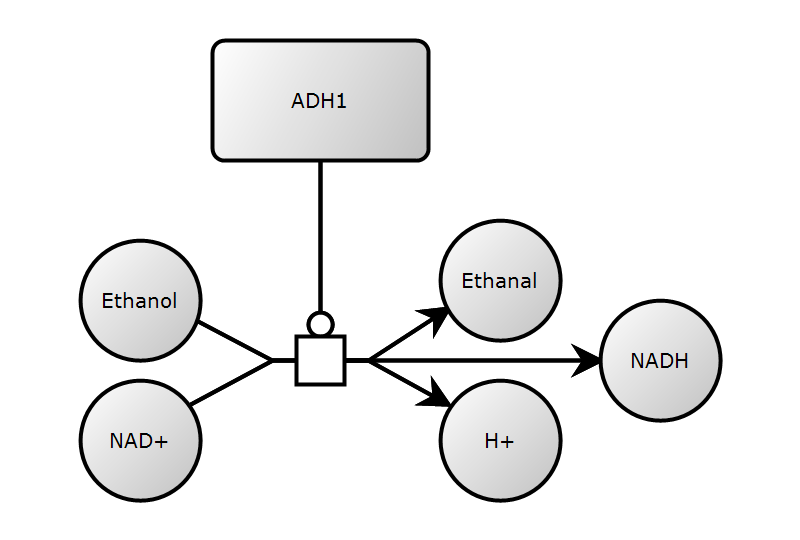

In [2]:
# import libsbgn and important SBGN types
import libsbgnpy.libsbgn as libsbgn 
from libsbgnpy.libsbgnTypes import Language, GlyphClass, ArcClass, Orientation

# create empty sbgn
sbgn = libsbgn.sbgn()

# create map, set language and set in sbgn
map = libsbgn.map()
map.set_language(Language.PD)
sbgn.set_map(map)

# create a bounding box for the map
box = libsbgn.bbox(x=0, y=0, w=363, h=253)
map.set_bbox(box)

# create some glyphs
# class attribute is named 'class_' ! in glyphs and arcs
'''
	<glyph class="simple chemical" id="glyph1">
		<label text="Ethanol"/> <!-- fontsize="" etc -->
		<!-- Line breaks are allowed in the text attribute -->
		<bbox x="40" y="120" w="60" h="60"/>
	</glyph>
'''
# glyphs with labels
g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph1')
g.set_label(libsbgn.label(text='Ethanol'))
g.set_bbox(libsbgn.bbox(x=40, y=120, w=60, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph_ethanal')
g.set_label(libsbgn.label(text='Ethanal'))
g.set_bbox(libsbgn.bbox(x=220, y=110, w=60, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.MACROMOLECULE, id='glyph_adh1')
g.set_label(libsbgn.label(text='ADH1'))
g.set_bbox(libsbgn.bbox(x=106, y=20, w=108, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph_h')
g.set_label(libsbgn.label(text='H+'))
g.set_bbox(libsbgn.bbox(x=220, y=190, w=60, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph_nad')
g.set_label(libsbgn.label(text='NAD+'))
g.set_bbox(libsbgn.bbox(x=40, y=190, w=60, h=60))
map.add_glyph(g)

g = libsbgn.glyph(class_=GlyphClass.SIMPLE_CHEMICAL, id='glyph_nadh')
g.set_label(libsbgn.label(text='NADH'))
g.set_bbox(libsbgn.bbox(x=300, y=150, w=60, h=60))
map.add_glyph(g)

# glyph with ports (process)
g = libsbgn.glyph(class_=GlyphClass.PROCESS, id='pn1', 
                  orientation=Orientation.HORIZONTAL)
g.set_bbox(libsbgn.bbox(x=148, y=168, w=24, h=24))
g.add_port(libsbgn.port(x=136, y=180, id="pn1.1"))
g.add_port(libsbgn.port(x=184, y=180, id="pn1.2"))
map.add_glyph(g)

# arcs
# create arcs and set the start and end points
a = libsbgn.arc(class_=ArcClass.CONSUMPTION, source="glyph1", target="pn1.1", id="a01")
a.set_start(libsbgn.startType(x=98, y=160))
a.set_end(libsbgn.endType(x=136, y=180))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.PRODUCTION, source="pn1.2", target="glyph_nadh", id="a02")
a.set_start(libsbgn.startType(x=184, y=180))
a.set_end(libsbgn.endType(x=300, y=180))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.CATALYSIS, source="glyph_adh1", target="pn1", id="a03")
a.set_start(libsbgn.startType(x=160, y=80))
a.set_end(libsbgn.endType(x=160, y=168))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.PRODUCTION, source="pn1.2", target="glyph_h", id="a04")
a.set_start(libsbgn.startType(x=184, y=180))
a.set_end(libsbgn.endType(x=224, y=202))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.PRODUCTION, source="pn1.2", target="glyph_ethanal", id="a05")
a.set_start(libsbgn.startType(x=184, y=180))
a.set_end(libsbgn.endType(x=224, y=154))
map.add_arc(a)

a = libsbgn.arc(class_=ArcClass.CONSUMPTION, source="glyph_nad", target="pn1.1", id="a06")
a.set_start(libsbgn.startType(x=95, y=202))
a.set_end(libsbgn.endType(x=136, y=180))
map.add_arc(a)

# write SBGN to file
f_out = tempfile.NamedTemporaryFile(suffix=".sbgn")
sbgn.write_file(f_out.name)

# render SBGN
from libsbgnpy import render
f_png = tempfile.NamedTemporaryFile(suffix=".png")
render.render_sbgn(sbgn, image_file=f_png.name, file_format="png")
Image(f_png.name, width=300)

## Iterate Arcs & Glyphs
Example for iterating over glyphs and arcs in given SBGN file

In [3]:
import libsbgnpy.libsbgn as libsbgn  
from libsbgnpy import utils

# sbgn and map
sbgn = utils.read_from_file("adh.sbgn")
map = sbgn.get_map()
print('Language:', map.get_language(), "\n")

# glyphs
'''
<glyph class="simple chemical" id="glyph1">
        <label text="Ethanol"/> <!-- fontsize="" etc -->
        <!-- Line breaks are allowed in the text attribute -->
        <bbox x="40" y="120" w="60" h="60"/>
    </glyph>
'''
glyphs = map.get_glyph()
for g in glyphs:
    cls = g.get_class()
    print(cls, g.get_id())
    label = g.get_label()
    if cls == 'simple chemical':
        print('label: ', label.get_text())

    if cls == 'process':
        for p in g.get_port():
            print('port ', p.get_id(), p.get_x(), p.get_y())

    box = g.get_bbox()
    utils.print_bbox(box)
    print()

# arcs
'''
    <arc class="consumption" source="glyph_nad" target="pn1.1" id="a06">
        <start x="95" y="202" />
        <end x="136" y="180" />
    </arc>
'''
arcs = map.get_arc()
for a in arcs:
    print(a.get_class(), a.get_source(), a.get_target(), a.get_id())
    start = a.get_start()
    print(start.x, start.y)
    end = a.get_end()
    print(end.x, end.y)

Language: Language.PD 

GlyphClass.SIMPLE_CHEMICAL glyph1
x, y, w, h :  40.0 120.0 60.0 60.0

GlyphClass.SIMPLE_CHEMICAL glyph_ethanal
x, y, w, h :  220.0 110.0 60.0 60.0

GlyphClass.MACROMOLECULE glyph_adh1
x, y, w, h :  106.0 20.0 108.0 60.0

GlyphClass.SIMPLE_CHEMICAL glyph_h
x, y, w, h :  220.0 190.0 60.0 60.0

GlyphClass.SIMPLE_CHEMICAL glyph_nad
x, y, w, h :  40.0 190.0 60.0 60.0

GlyphClass.SIMPLE_CHEMICAL glyph_nadh
x, y, w, h :  300.0 150.0 60.0 60.0

GlyphClass.PROCESS pn1
x, y, w, h :  148.0 168.0 24.0 24.0

ArcClass.CONSUMPTION glyph1 pn1.1 a01
98.0 160.0
136.0 180.0
ArcClass.PRODUCTION pn1.2 glyph_nadh a02
184.0 180.0
300.0 180.0
ArcClass.CATALYSIS glyph_adh1 pn1 a03
160.0 80.0
160.0 168.0
ArcClass.PRODUCTION pn1.2 glyph_h a04
184.0 180.0
224.0 202.0
ArcClass.PRODUCTION pn1.2 glyph_ethanal a05
184.0 180.0
224.0 154.0
ArcClass.CONSUMPTION glyph_nad pn1.1 a06
95.0 202.0
136.0 180.0


## SBGN notes
The optional SBGN element named 'notes', present on every major SBGN
component type, is intended as a place for storing optional
information intended to be seen by humans.  An example use of the
'notes' element would be to contain formatted user comments about the
model element in which the 'notes' element is enclosed.  Every object
derived directly or indirectly from type SBase can have a separate
value for 'notes', allowing users considerable freedom when adding
comments to their models.

The format of 'notes' elements must be XHTML 1.0 (http://www.w3.org/1999/xhtml).

### Write SBGN notes

In [4]:
from libsbgnpy import libsbgn, Notes, Language
from libsbgnpy import utils

sbgn = libsbgn.sbgn()
map = libsbgn.map()
map.set_language(Language.PD)
sbgn.set_map(map)

# create a glyph with an id and class "macromolecule"
g = libsbgn.glyph()
g.set_id("g1")

# define a label for this glyph
label = libsbgn.label()
label.set_text("INSR")

bbox = libsbgn.bbox(x=100, y=100, w=80, h=40)
g.set_bbox(bbox)
map.add_glyph(g)

notes = Notes("""
<body xmlns="http://www.w3.org/1999/xhtml">
    This is an example note describing the INSR glyph.
</body>""")
g.set_notes(notes)

pprint_xml(utils.write_to_string(sbgn))

### Read SBGN notes
SBGN notes can be read via the `get_notes` function which returns a `Notes` instance. We just display the note we wrote before on one of the glyphs.

In [5]:
map = sbgn.get_map()

glyphs = map.get_glyph()
for g in glyphs:
    notes = g.get_notes()
    if notes:
        print('* {} *'.format(g.get_id()))
        print(notes)

* g1 *
<body xmlns="http://www.w3.org/1999/xhtml">
    This is an example note describing the INSR glyph.
</body>


## SBGN extension
SBGN allows to write extension information. This can be any well-formed XML content.
Whereas Notes is a container for content to be shown directly to humans, Extension is a container for
optional software-generated content not meant to be shown to humans. Every SBGN object can
have its own Extension object instance. In XML, the Extension content type is any, allowing essentially
arbitrary well-formed XML data content.

### Write SBGN extension

In [6]:
from libsbgnpy import libsbgn
from libsbgnpy import utils
from libsbgnpy import Extension, Language
sbgn = libsbgn.sbgn()
map = libsbgn.map()
map.set_language(Language.PD)
sbgn.set_map(map)

extension = Extension("""<renderInformation id="example" programName="SBML Layout" programVersion="3.0"
 xmlns="http://projects.eml.org/bcb/sbml/render/level2">
    <listOfColorDefinitions>
    <colorDefinition id="yelloComp" value="#ffffccff" />
    <colorDefinition id="grayComp" value="#e0e0e0ff" />
    <colorDefinition id="orange" value="#fa9e2fff" />
    <colorDefinition id="blue" value="#2958acff" />
    <colorDefinition id="green" value="#378f5cff" />
    <colorDefinition id="Color_0" value="#969696" />
    <colorDefinition id="Color_1" value="#ff9900" />
    <colorDefinition id="Color_2" value="#000000" />			
    </listOfColorDefinitions>
    <listOfGradientDefinitions>
    <linearGradient x1="0%" y1="0%" z1="0%" x2="100%" y2="0%" z2="100%" id="LinearGradient_0" spreadMethod="reflect">
        <stop offset="0%" stop-color="#ccffff" />
        <stop offset="100%" stop-color="#ffffff" />
    </linearGradient>
    <linearGradient x1="0%" y1="0%" z1="0%" x2="100%" y2="0%" z2="100%" id="OrangeGradient_0" spreadMethod="reflect">
        <stop offset="0%" stop-color="#ffffff" />
        <stop offset="100%" stop-color="#fa9e2fff" />
    </linearGradient>
    <linearGradient x1="0%" y1="0%" z1="0%" x2="100%" y2="0%" z2="100%" id="BlueGradient_0" spreadMethod="reflect">
        <stop offset="0%" stop-color="#ffffff" />
        <stop offset="100%" stop-color="#2958acff" />
    </linearGradient>
    <linearGradient x1="0%" y1="0%" z1="0%" x2="100%" y2="0%" z2="100%" id="GreenGradient_0" spreadMethod="reflect">
        <stop offset="0%" stop-color="#ffffff" />
        <stop offset="100%" stop-color="#378f5cff" />
    </linearGradient>
    </listOfGradientDefinitions>
    <listOfStyles>
    <style idList="glyph0 glyph2 glyph14 glyph34 ">
        <g stroke="Color_2" stroke-width="5" fill="yelloComp"  />			
    </style>
    <style idList="glyph1">
        <g stroke="Color_2" stroke-width="5" fill="grayComp"  />			
    </style>
    </listOfStyles>
</renderInformation>""")
map.set_extension(extension)

pprint_xml(utils.write_to_string(sbgn))

### Read SBGN extension
We now read the map extension information written in the example above.

In [7]:
# map is a container for the glyphs and arcs
map = sbgn.get_map()

extension = map.get_extension()
if extension:
    print(extension)

<renderInformation id="example" programName="SBML Layout" programVersion="3.0"
 xmlns="http://projects.eml.org/bcb/sbml/render/level2">
    <listOfColorDefinitions>
    <colorDefinition id="yelloComp" value="#ffffccff" />
    <colorDefinition id="grayComp" value="#e0e0e0ff" />
    <colorDefinition id="orange" value="#fa9e2fff" />
    <colorDefinition id="blue" value="#2958acff" />
    <colorDefinition id="green" value="#378f5cff" />
    <colorDefinition id="Color_0" value="#969696" />
    <colorDefinition id="Color_1" value="#ff9900" />
    <colorDefinition id="Color_2" value="#000000" />			
    </listOfColorDefinitions>
    <listOfGradientDefinitions>
    <linearGradient x1="0%" y1="0%" z1="0%" x2="100%" y2="0%" z2="100%" id="LinearGradient_0" spreadMethod="reflect">
        <stop offset="0%" stop-color="#ccffff" />
        <stop offset="100%" stop-color="#ffffff" />
    </linearGradient>
    <linearGradient x1="0%" y1="0%" z1="0%" x2="100%" y2="0%" z2="100%" id="OrangeGradient_0" spr

## Read & Write SBGN
Helper functions for reading, writing and printing SBGN are provided in the `utils` module.

### Write SBGN  to string
The SBGN string can be generated from the `sbgn` object via

In [8]:
from libsbgnpy import utils
sbgn_str = utils.write_to_string(sbgn)

In [9]:


pprint_xml(sbgn_str)

### Write SBGN to file

In [10]:
from libsbgnpy import utils
sbgn_str = utils.write_to_string(sbgn)
f_out = tempfile.NamedTemporaryFile(suffix=".sbgn")
sbgn.write_file(f_out.name)

### Read SBGN from file

In [11]:
from libsbgnpy import utils
sbgn = utils.read_from_file("glycolysis.sbgn")
print(sbgn)

## Render SBGN
SBGN images can be renderd via the `render` module.

SBGN rendered: /tmp/tmpTbRuvI.png


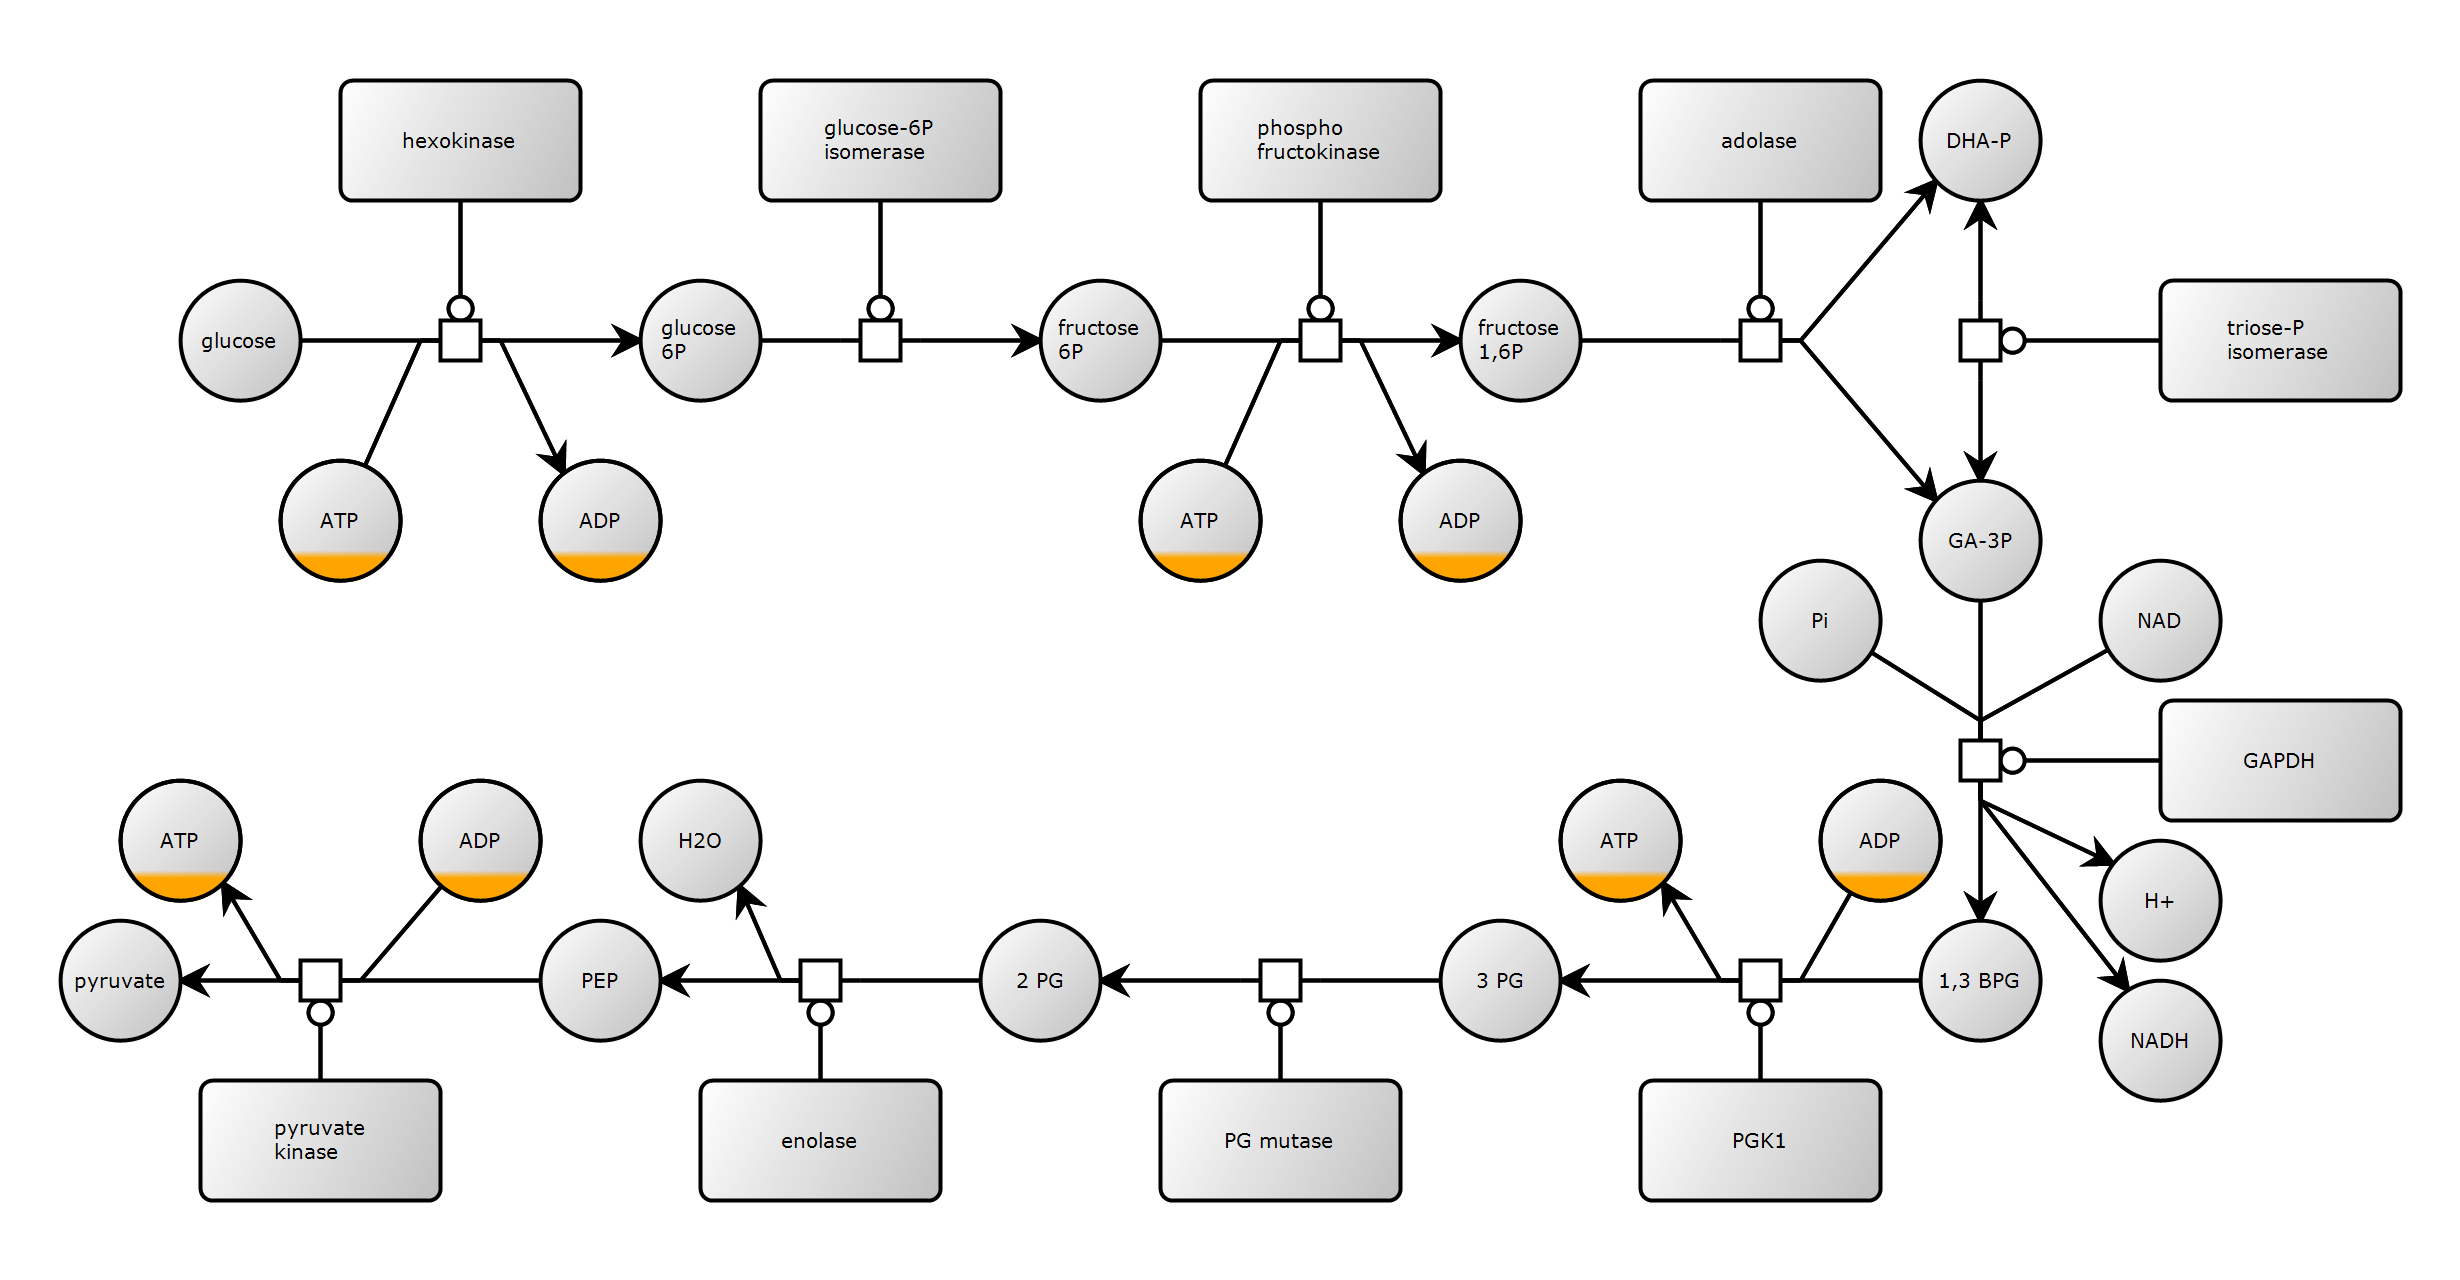

In [12]:
## Render SBGN
from libsbgnpy import render, utils
sbgn = utils.read_from_file("glycolysis.sbgn")
f_png = tempfile.NamedTemporaryFile(suffix=".png")
render.render_sbgn(sbgn, image_file=f_png.name, 
                   file_format="png")
Image(f_png.name, width=500)